# 탐색적자료분석 8장 과제

## 202115789 통계학과 김지우

## 숙제 1

### 1-1) 여러 가지 평활 기법(4253H, twiceit, 3RSSH, twiceit 등) 을 이용하여 평활 해 보고 탐색하시오

In [112]:
elec <- read.csv('용도별_전력사용량_20220527214927.csv', header = TRUE)[c(-1,-2,-3), c(-1, -4)] 
colnames(elec) <- c(2013, 2014, 2016, 2017, 2018, 2019)
rownames(elec) <- 1:12
elec[,1:6] <- elec[,1:6] %>% unlist() %>% as.numeric()
elec

,2013,2014,2016,2017,2018,2019
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4111542,4240903,4278712,4362665,4628993,4792097
2,3622215,3924659,4101465,4225253,4387240,4297030
3,3808272,4085945,4090460,4277073,4370210,4414219
4,3708180,3889221,3938652,4069577,4158537,4272633
5,3659870,3820255,3822073,3974475,4128142,4294717
6,3581181,3809582,3789423,4000824,4102184,4253487
7,3708929,3920746,4019425,4240321,4342389,4475404
8,3766940,3891818,4182948,4316873,4626019,4611353
9,3671778,3745396,3924897,4109028,4195754,4253081


#### 4253H, twice를 이용한 평활

In [113]:
install.packages('sleekts')
library(sleekts)

Warning message:
"패키지 'sleekts'가 사용중이므로 설치되지 않을 것입니다"


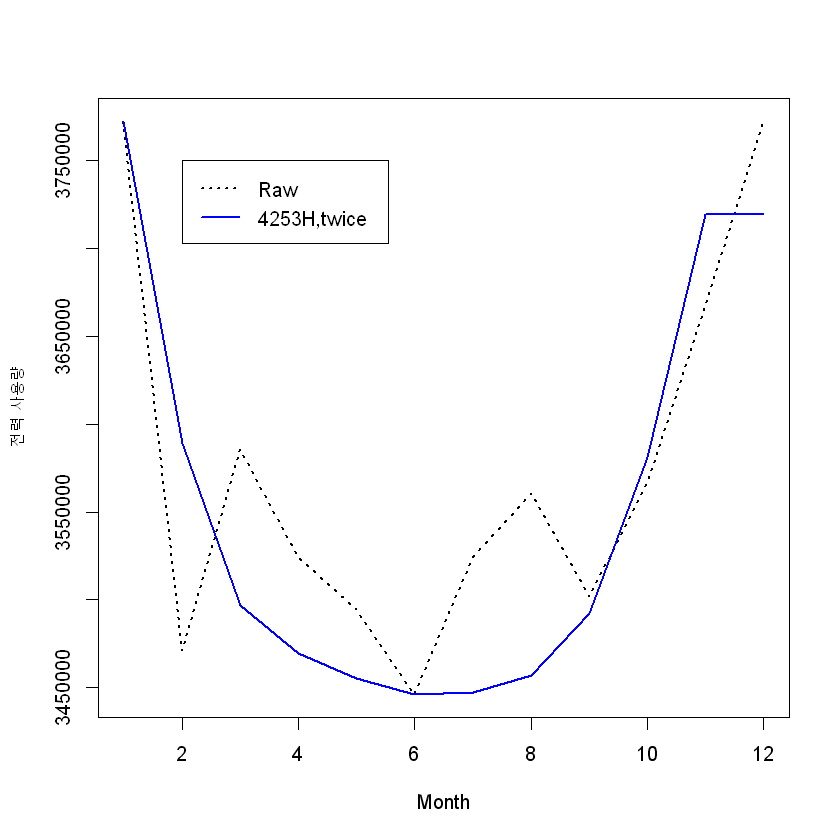

In [114]:
h4253=sleek(elec$'2013')
plot(elec$'2013',type="l",ylab="",lty="dotted",xlab="Month",lwd=2, yaxt = 'n')
par(new=T)
plot(h4253,type="l",ylab="전력 사용량",xlab="Month", col="blue",lwd=2)
legend(x = 2, y = 3750000, c("Raw", "4253H,twice"), 
       col = c("black","blue"), 
       lty=c(3,1),lwd=2)

#### 3RSSH, twice를 이용한 평활

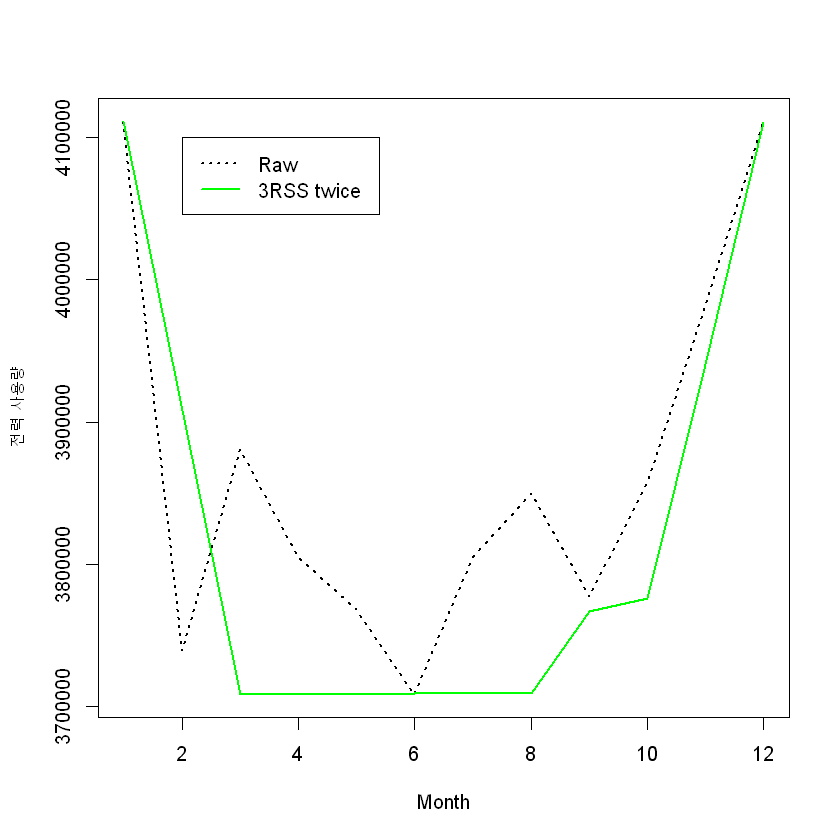

In [115]:
a3rssh2=function(x){
  n=length(x)
  x3rss=smooth(x,kind="3RSS")
  x3rssh <- vector("numeric",n)
  x3rssh2 <- vector("numeric",n)
  for (i in 2:(n-1)) x3rssh[i] <- x3rss[i-1]/4 + x3rss[i]/2 + x3rss[i+1]/4
  x3rssh[1] <- x3rss[1]; x3rssh[n] <- x3rss[n]
  rough=x-x3rssh
  
  x3rss2=smooth(rough,kind="3RSS")
  
  for (i in 2:(n-1)) x3rssh2[i] <- x3rss2[i-1]/4 + x3rss2[i]/2 + x3rss2[i+1]/4
  x3rssh2[1] <- x3rss2[1]; x3rssh2[n] <- x3rss2[n]
  end=x3rssh+x3rssh2
  return(end)
  }
ts.friday=ts(elec$'2013')
smooth.f=smooth(ts.friday,kind="3RSS",twiceit = T)
plot(elec$'2013',type="l",ylab="전력 사용량",lty="dotted",xlab="Month",lwd=2, yaxt = 'n')
par(new=T)
plot(smooth.f,xlab="",ylab="",col="green",lwd=2) #3RSS3RSS
legend(x = 2, y = 4100000, c("Raw", "3RSS twice"), 
      col = c("black","green"),
      lty=c(3,1),lwd=2)

#### Comment

- 여름철의 전력사용량이 적고 겨울철의 전력사용량이 높다.

### 1-2) decompose( ) 함수를 써서 시계열 분해를 하고 추세와 게절성을 탐색하시오

In [136]:
elec

,2013,2014,2016,2017,2018,2019
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4111542,4240903,4278712,4362665,4628993,4792097
2,3622215,3924659,4101465,4225253,4387240,4297030
3,3808272,4085945,4090460,4277073,4370210,4414219
4,3708180,3889221,3938652,4069577,4158537,4272633
5,3659870,3820255,3822073,3974475,4128142,4294717
6,3581181,3809582,3789423,4000824,4102184,4253487
7,3708929,3920746,4019425,4240321,4342389,4475404
8,3766940,3891818,4182948,4316873,4626019,4611353
9,3671778,3745396,3924897,4109028,4195754,4253081


In [116]:
elec_T <- t(elec)

In [150]:
log_elec_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,8.321553,8.352531,8.361407,8.380838,8.440095,8.474723,8.194841,8.275035,8.319100,8.348834,8.386456,8.365679
2014,8.244931,8.315308,8.316413,8.361024,8.382566,8.392586,8.218296,8.265964,8.278594,8.311294,8.332919,8.359986
2015,8.205183,8.248072,8.248548,8.287648,8.325583,8.365141,8.183448,8.245275,8.239969,8.294256,8.319275,8.355494
2016,8.218498,8.274037,8.298894,8.352394,8.376180,8.406352,8.234018,8.266632,8.338772,8.370287,8.439452,8.436277
2017,8.208431,8.228283,8.275095,8.320942,8.341828,8.355399,8.236467,8.247499,8.269555,8.269683,8.329055,8.328897
2018,8.279102,8.289756,8.320531,8.357766,8.379784,8.375236,8.321341,8.334594,8.365282,8.397788,8.427853,8.411988


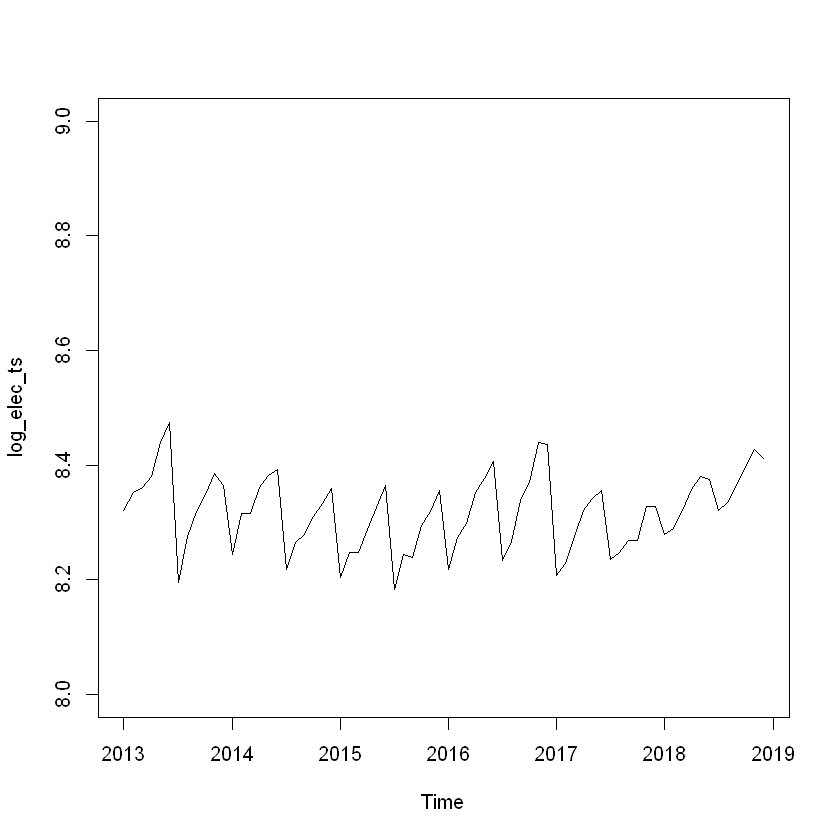

In [159]:
kk <- elec_T %>% unlist %>% as.numeric()
elec_ts <- ts(kk/1000, start = c(2013, 1), frequency = 12)
log_elec_ts <- log(elec_ts)
plot(log_elec_ts, ylim = c(8,9))

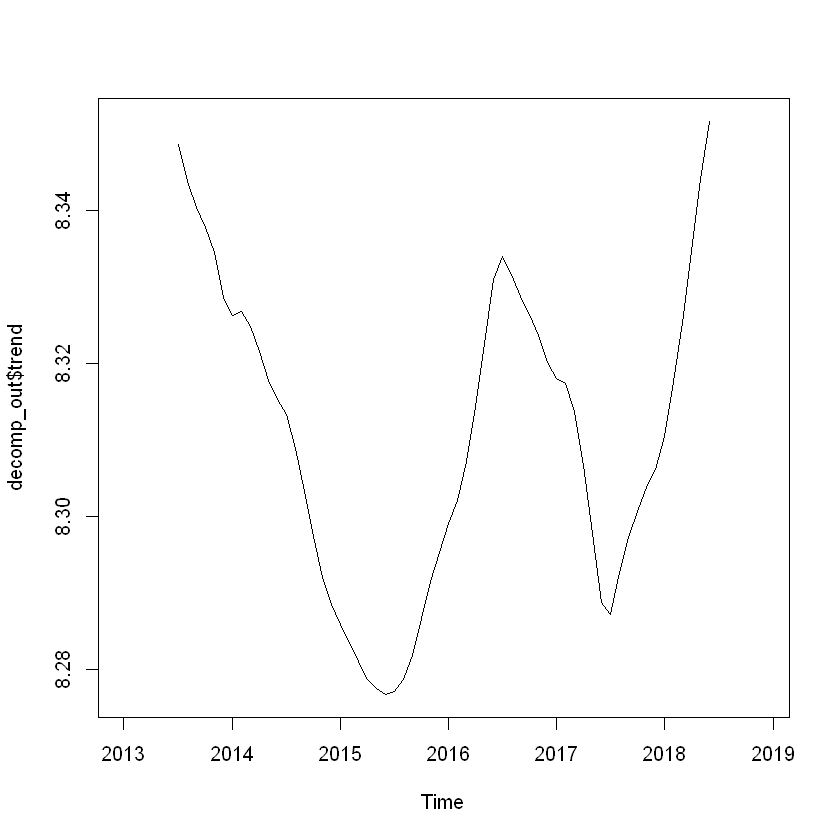

In [164]:
decomp_out <- decompose(log_elec_ts)
plot(decomp_out$trend)

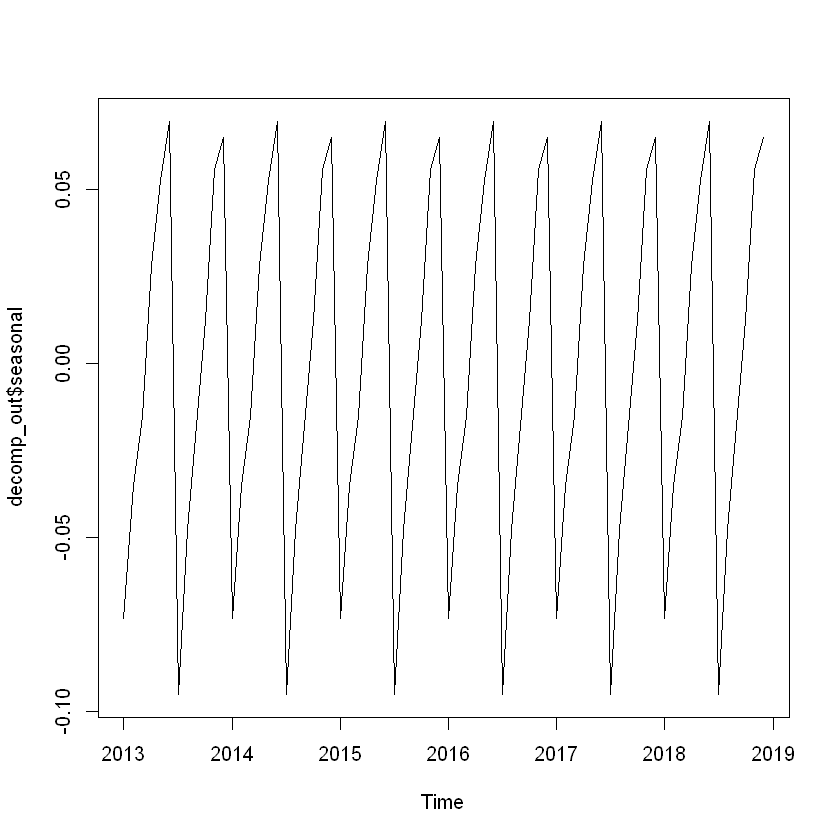

In [161]:
plot(decomp_out$seasonal)

#### Comment

- 계절성이 두드러진다.

### 1-3) ACF를 그리고 탐색해 보시오

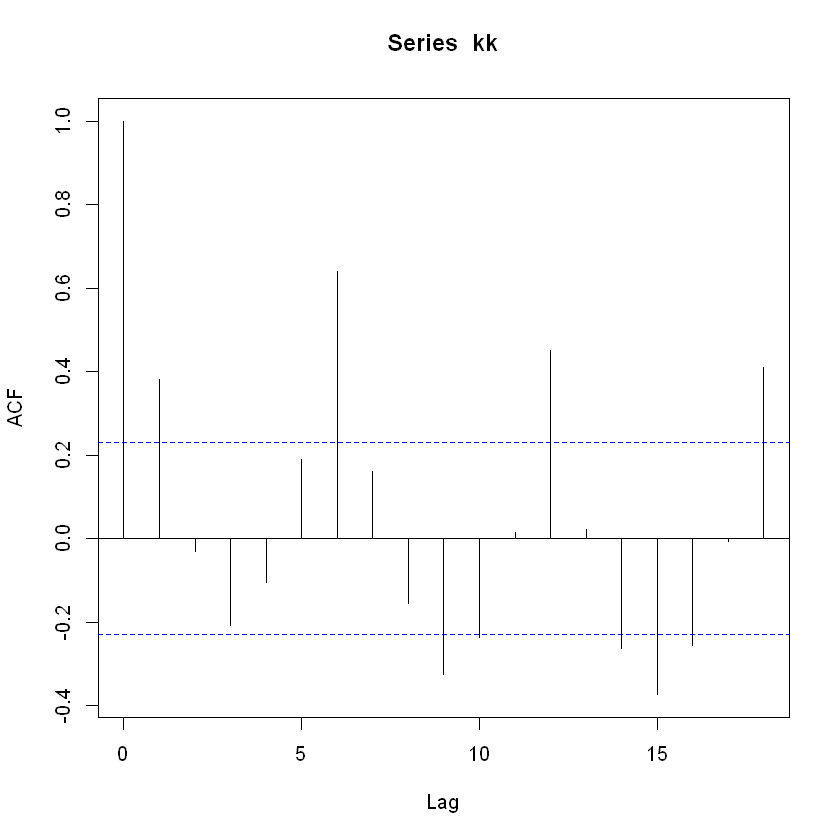

In [171]:
acf(kk)

- 양과 음을 반복함에 있어 어느정도 주기성이 존재하는데 이는 계절에 따라 전력 사용량이 다름을 말한다.

## 숙제 2

### 2-1) 여러 가지 평활 기법(4253H, twiceit, 3RSSH, twiceit 등) 을 이용하여 평활 해 보고 탐색하시오

In [181]:
rice <- read.csv('농업생산량_쌀__20220524102135.csv', header = TRUE)
colnames(rice) <- c('연도', '생산량')
head(rice)

,연도,생산량
,<int>,<int>
1,1980,5311406
2,1981,7148703
3,1982,7307855
4,1983,7607541
5,1984,7970330
6,1985,7855262


#### 4253H, twiceit를 이용한 평활

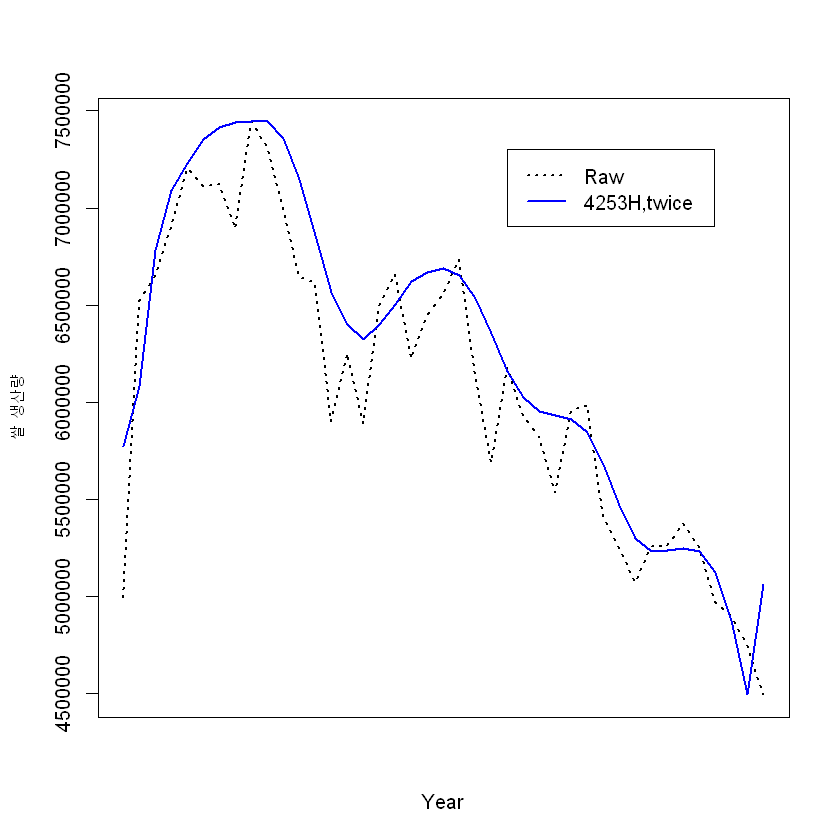

In [198]:
h4253=sleek(rice$'생산량')
plot(rice$'생산량',type="l",ylab="",lty="dotted",xlab="",lwd=2, yaxt = 'n', xaxt = 'n')
par(new=T)
plot(h4253,type="l",ylab="쌀 생산량",xlab="Year", col="blue",lwd=2, xaxt = 'n')
legend(x = 25, y = 7300000, c("Raw", "4253H,twice"), 
       col = c("black","blue"), 
       lty=c(3,1),lwd=2)

#### 3RSSH, twice를 이용한 평활

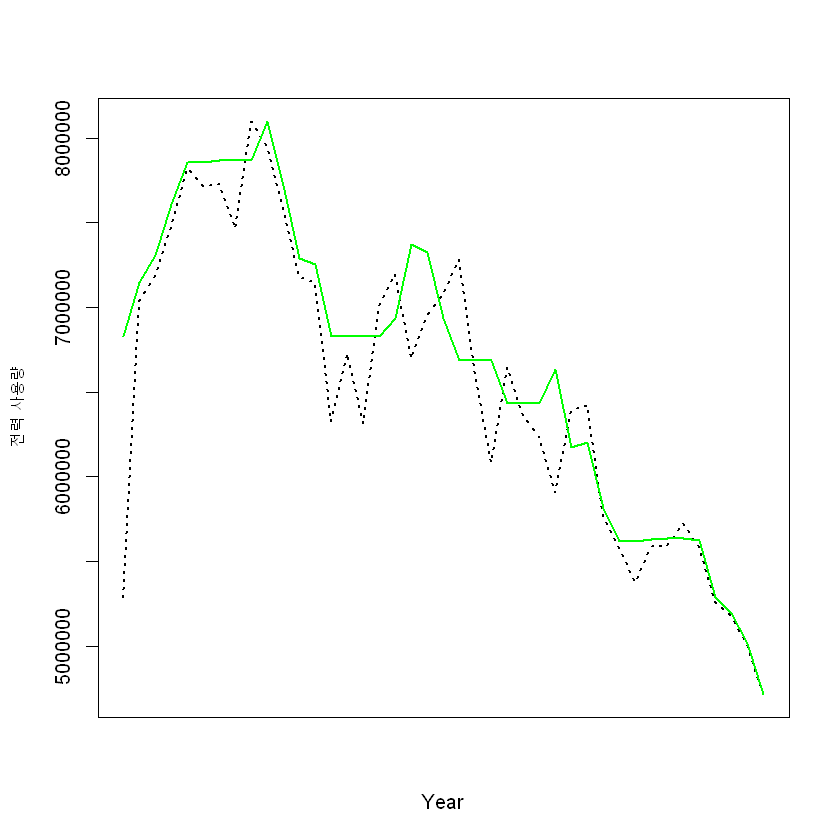

In [199]:
ts.friday=ts(rice$'생산량')
smooth.f=smooth(ts.friday,kind="3RSS",twiceit = T)
plot(rice$'생산량',type="l",ylab="전력 사용량",lty="dotted",xlab="Year",lwd=2, yaxt = 'n', xaxt = 'n')
par(new=T)
plot(smooth.f,xlab="",ylab="",col="green",lwd=2, xaxt = 'n') #3RSS3RSS
legend(x = 2, y = 4100000, c("Raw", "3RSS twice"), 
      col = c("black","green"),
      lty=c(3,1),lwd=2)

#### Comment

- 최근들어 쌀 생산량이 금감하고 있다.

### 2-2) decompose( ) 함수를 써서 시계열 분해를 하고 추세와 게절성을 탐색하시오

- 시계열 분해가 불가능한 데이터이다.

## 숙제 3

### 3-1) 상관계수와 자기상관계수를 비교 설명하시오.

상관계수와 자기상관계수의 유사한 점은 두 연속형 변수 간의 관계를 분석하다는 점입니다. 기본 개념은 공분산을 표준편차로 나누어서 표준화해주며, -1 ~ 1 사이의 값을 가지게 됩니다. 

상관계수와 자기상관계수가 서로 다른 점은, 상관계수는 특정 동일 시점을 횡단면으로 해서 Y와 다른 X1, X2, ... 변수들 간의 관계를 분석합니다. 반면에 자기상관계수는 동일한 변수(Yt, Yt-1, Yt-2, ...)의 서로 다른 시간 차이를 두고 관계를 분석하는 것입니다. 

### 3-2-1) 𝑡=1,2,⋯,50,  에서 𝑦_𝑡=𝑠𝑖𝑛𝑒(2𝑡)+𝑛𝑜𝑖𝑠𝑒,  𝑛𝑜𝑖𝑐𝑒~𝑁(0,1)이라 할 때 𝑦_𝑡 를 그리고 탐색하시오.

In [236]:
t <- 1:50
noise <- rnorm(50, 0, 1)
y_t <- sin(2*t) + noise

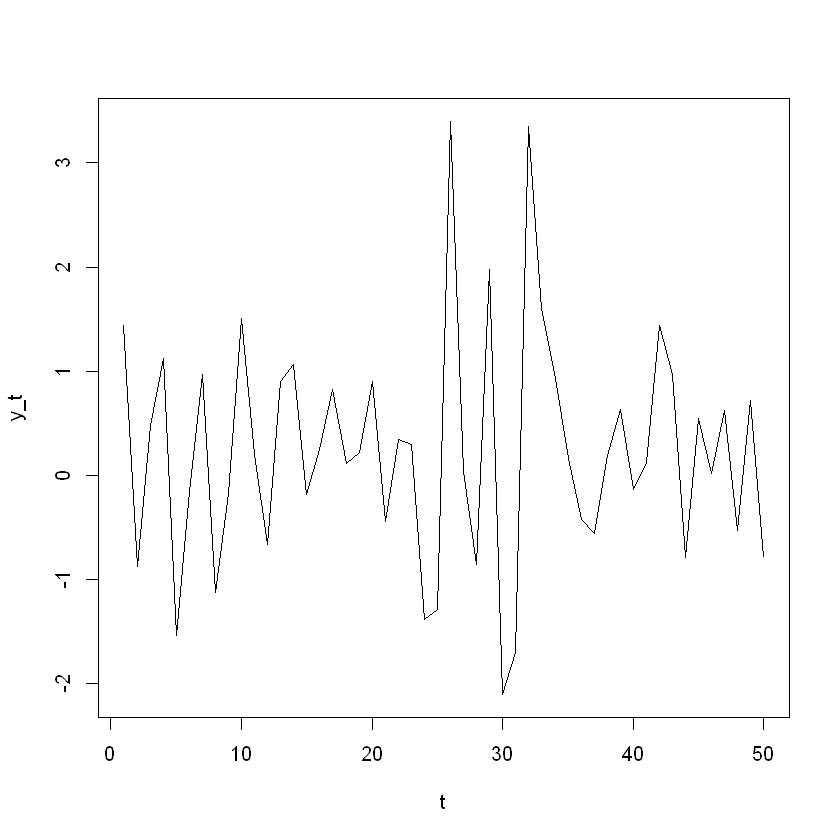

In [237]:
plot(t, y_t, type = 'l')

### 3-2-2) ACF를 그리고 탐색하시오.

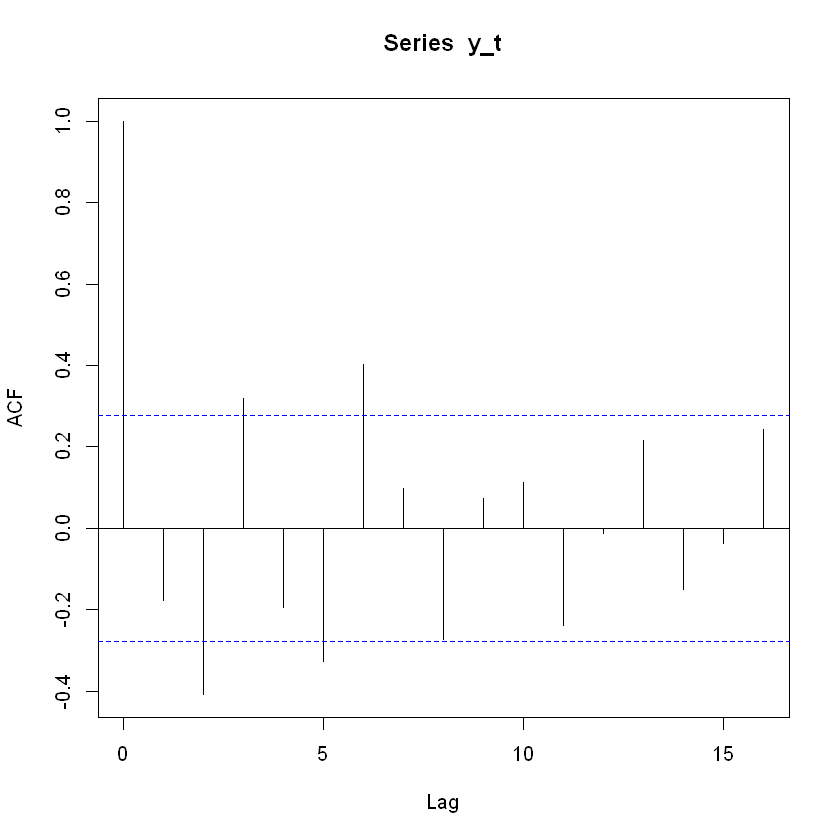

In [238]:
acf(y_t)

- 별다른 패턴이 존재하지 않는 것으로 보인다.